| Wohnfläche (qm) | Preis (EUR) |
| --------------: | ----------: |
|             100 |         400 |
|             150 |         500 |

In [1]:
import numpy as np

# import cupy as np
# np.cuda.Device(0).use()

In [2]:
input_data = [
    [100, 400],
    [150, 500],
    # [120, 600], # experiment
    # [170, 550]  # experiment
]

In [3]:
def gradientDescentStep(input_data, theta: np.ndarray, alpha):
    n = len(input_data)
    pre_theta = np.zeros(2)
    pre_factor = alpha / n
    for i in range(n):
        x = np.array([1, input_data[i][0]])
        y = input_data[i][1]
        pre_theta = pre_theta + pre_factor * ((y - (theta@x)) * x)
    return theta + pre_theta

In [4]:
# alpha = 0.0001055
alpha = 0.00005
theta = np.array([100, 3])  # starting point
rounds = 10000000

log_interval = 1000000
snapshot_interval = 1000000

In [5]:
print(f"[0/{rounds}] f(x)={theta[1]} * x + {theta[0]}")
theta_history = [theta]
for i in range(1, rounds + 1):
    theta = gradientDescentStep(input_data, theta, alpha)
    if i % log_interval == 0:
        print(f"[{i}/{rounds}] f(x)={theta[1]} * x + {theta[0]} ({theta})")
    if i % snapshot_interval == 0:
        theta_history.append(theta)

[0/10000000] f(x)=3 * x + 100
[1000000/10000000] f(x)=2.1124429682836015 * x + 185.38244871892115 ([185.38244872   2.11244297])
[2000000/10000000] f(x)=2.016436116804373 * x + 197.86330987239901 ([197.86330987   2.01643612])
[3000000/10000000] f(x)=2.002402515156958 * x + 199.68767376878714 ([199.68767377   2.00240252])
[4000000/10000000] f(x)=2.000351182651518 * x + 199.95434636335244 ([199.95434636   2.00035118])
[5000000/10000000] f(x)=2.000051333393009 * x + 199.9933266747028 ([199.99332667   2.00005133])
[6000000/10000000] f(x)=2.0000075035518603 * x + 199.99902454056678 ([199.99902454   2.0000075 ])
[7000000/10000000] f(x)=2.0000010968160815 * x + 199.9998574142469 ([199.99985741   2.0000011 ])
[8000000/10000000] f(x)=2.000000160324814 * x + 199.99997915782353 ([199.99997916   2.00000016])
[9000000/10000000] f(x)=2.0000000234351893 * x + 199.99999695343257 ([199.99999695   2.00000002])
[10000000/10000000] f(x)=2.0000000034258694 * x + 199.999999554638 ([199.99999955   2.        ]

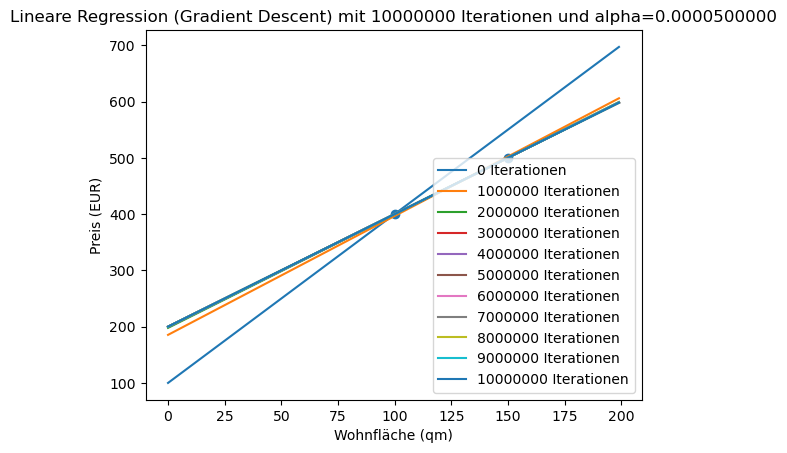

In [6]:
import matplotlib.pyplot as plt

draw_range = range(0, max([x[0] for x in input_data]) + 50)
for i, theta in enumerate(theta_history):
    approximation = np.array([theta[1] * x + theta[0] for x in draw_range])
    plt.plot(draw_range, approximation, label=f"{i * snapshot_interval} Iterationen")
# correct = np.array([2 * x + 200 for x in draw_range])
# plt.plot(draw_range, correct, label="Berechnet mit Normalengleichung")
plt.scatter([x[0] for x in input_data], [x[1] for x in input_data])
plt.xlabel("Wohnfläche (qm)")
plt.ylabel("Preis (EUR)")
plt.title(f"Lineare Regression (Gradient Descent) mit {rounds} Iterationen und alpha={alpha:.10f}")
plt.legend()
plt.show()